In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Đọc dữ liệu
df = pd.read_csv('../data/sensor_data_labeled.csv')

# Chọn các cột dữ liệu cảm biến
sensor_cols = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
sensor_data = df[sensor_cols].copy()

# Chuyển đổi các cột dữ liệu cảm biến sang kiểu số (float)
for col in sensor_cols:
    sensor_data[col] = pd.to_numeric(sensor_data[col], errors='coerce')
    print(f"Đã chuyển đổi cột '{col}' sang kiểu số. Số lượng NaN sau chuyển đổi: {sensor_data[col].isnull().sum()}")

# Ép kiểu toàn bộ sensor_data DataFrame sang float64
sensor_data = sensor_data.astype('float64')

# Kiểm tra lại kiểu dữ liệu sau chuyển đổi và ép kiểu
print("\nKiểu dữ liệu của sensor_data sau chuyển đổi và ép kiểu:")
print(sensor_data.dtypes)
print("\n5 dòng đầu tiên của sensor_data sau chuyển đổi và ép kiểu:")
print(sensor_data.head())

# Loại bỏ các hàng có giá trị NaN trong các cột cảm biến
sensor_data_cleaned = sensor_data.dropna(subset=sensor_cols)
print(f"\nSố lượng hàng trước khi loại bỏ NaN: {len(sensor_data)}")
print(f"Số lượng hàng sau khi loại bỏ NaN: {len(sensor_data_cleaned)}")

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu đã chuyển đổi và làm sạch
scaled_data = scaler.fit_transform(sensor_data_cleaned)

# Tạo DataFrame mới với dữ liệu đã chuẩn hóa
scaled_df = pd.DataFrame(scaled_data, columns=sensor_data_cleaned.columns)

# Thêm lại cột 'timestamp' và 'label'
scaled_df['timestamp'] = df.loc[sensor_data_cleaned.index, 'timestamp'].values
scaled_df['label'] = df.loc[sensor_data_cleaned.index, 'label'].values

# Kiểm tra 5 dòng đầu của DataFrame đã chuẩn hóa
print("\n5 dòng đầu tiên của DataFrame đã chuẩn hóa (scaled_df):")
print(scaled_df.head())

# Lưu dữ liệu đã chuẩn hóa (tùy chọn)
scaled_df.to_csv('../data/sensor_data_scaled.csv', index=False)

print("\nHoàn thành quá trình chuẩn hóa và lưu (nếu có).")

Đã chuyển đổi cột 'accel_x' sang kiểu số. Số lượng NaN sau chuyển đổi: 3
Đã chuyển đổi cột 'accel_y' sang kiểu số. Số lượng NaN sau chuyển đổi: 3
Đã chuyển đổi cột 'accel_z' sang kiểu số. Số lượng NaN sau chuyển đổi: 3
Đã chuyển đổi cột 'gyro_x' sang kiểu số. Số lượng NaN sau chuyển đổi: 3
Đã chuyển đổi cột 'gyro_y' sang kiểu số. Số lượng NaN sau chuyển đổi: 3
Đã chuyển đổi cột 'gyro_z' sang kiểu số. Số lượng NaN sau chuyển đổi: 3

Kiểu dữ liệu của sensor_data sau chuyển đổi và ép kiểu:
accel_x    float64
accel_y    float64
accel_z    float64
gyro_x     float64
gyro_y     float64
gyro_z     float64
dtype: object

5 dòng đầu tiên của sensor_data sau chuyển đổi và ép kiểu:
    accel_x   accel_y    accel_z     gyro_x     gyro_y     gyro_z
0 -1.027113 -1.462857   9.442731   4.450382   0.297710 -12.229008
1 -0.007183 -1.398214   9.897630   4.694656   3.847328  -9.396947
2 -0.792481 -1.364695  10.012551  -2.984733   5.801527   2.038168
3 -0.727837 -1.249773   9.952696 -10.610687  12.541985  

In [13]:
import numpy as np

def create_sliding_windows(data, labels, window_size):
    """Tạo các sliding window từ dữ liệu."""
    windows = []
    window_labels = []
    for i in range(window_size, len(data)):
        windows.append(data[i - window_size:i])
        window_labels.append(labels[i - 1])  # Lấy nhãn của mẫu cuối cùng trong window
    return np.array(windows), np.array(window_labels)

WINDOW_SIZE = 20  # Kích thước cửa sổ (tùy chỉnh)

# Lấy dữ liệu cảm biến đã chuẩn hóa và nhãn
scaled_sensor_values = scaled_df[['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']].values
labels = scaled_df['label'].values

# Tạo sliding windows
X, y_str = create_sliding_windows(scaled_sensor_values, labels, WINDOW_SIZE)

print("Kích thước của X (sau khi tạo windows):", X.shape)
print("Kích thước của y_str (sau khi tạo windows):", y_str.shape)

Kích thước của X (sau khi tạo windows): (9733, 20, 6)
Kích thước của y_str (sau khi tạo windows): (9733,)


In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Chuyển nhãn dạng chuỗi sang số
integer_labels = label_encoder.fit_transform(y_str)

# Chuyển nhãn số sang one-hot
one_hot_labels = to_categorical(integer_labels)

print("Các nhãn sau khi chuyển sang số:", integer_labels[:5])
print("Các nhãn sau khi chuyển sang one-hot encoding:\n", y_categorical[:5])
print("Các lớp nhãn (sau khi LabelEncoder fit):", label_encoder.classes_)

Các nhãn sau khi chuyển sang số: [2 2 2 2 2]
Các nhãn sau khi chuyển sang one-hot encoding:
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Các lớp nhãn (sau khi LabelEncoder fit): ['DANGEROUS TIPPING' 'STABLE' 'STRONG VIBRATION']


In [15]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu (ví dụ: 80% cho huấn luyện, 20% cho kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

print("Kích thước tập huấn luyện (X_train):", X_train.shape)
print("Kích thước tập kiểm tra (X_test):", X_test.shape)
print("Kích thước nhãn huấn luyện (y_train):", y_train.shape)
print("Kích thước nhãn kiểm tra (y_test):", y_test.shape)

Kích thước tập huấn luyện (X_train): (7786, 20, 6)
Kích thước tập kiểm tra (X_test): (1947, 20, 6)
Kích thước nhãn huấn luyện (y_train): (7786, 3)
Kích thước nhãn kiểm tra (y_test): (1947, 3)


In [16]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu (ví dụ: 80% cho huấn luyện, 20% cho kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_labels, test_size=0.2, random_state=42)
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Số lượng features (accel_x, ay, az, gx, gy, gz)
FEATURES = X_train.shape[2]
# Số lượng lớp (ỔN ĐỊNH, NGHIÊNG NGUY HIỂM, RUNG MẠNH)
NUM_CLASSES = y_train.shape[1]

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(WINDOW_SIZE, FEATURES), return_sequences=True),
    LSTM(units=50, activation='relu'),
    Dense(units=NUM_CLASSES, activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model.summary()

/home/NOISE/ai_agent_mpu6050/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,753 (124.04 KB)

 Trainable params: 31,753 (124.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7141 - loss: 0.7661 - val_accuracy: 0.9640 - val_loss: 0.1171
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9768 - loss: 0.1004 - val_accuracy: 0.6549 - val_loss: 0.4612
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8765 - loss: 0.4223 - val_accuracy: 0.9815 - val_loss: 0.0642
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9812 - loss: 0.0739 - val_accuracy: 0.9892 - val_loss: 0.0567
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9822 - loss: 0.0733 - val_accuracy: 0.9887 - val_loss: 0.0459
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9858 - loss: 0.0586 - val_accuracy: 0.9872 - val_loss: 0.0396
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9871 - loss: 0.0506 - val_accuracy: 0.9851 - val_loss: 0.0553
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9895 - loss: 0.0403 - val_accu

Loss trên tập kiểm tra: 0.0375
Độ chính xác trên tập kiểm tra: 0.9882
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report:
                   precision    recall  f1-score   support

DANGEROUS TIPPING       0.99      0.97      0.98       631
           STABLE       0.98      1.00      0.99       650
 STRONG VIBRATION       1.00      0.99      1.00       666

         accuracy                           0.99      1947
        macro avg       0.99      0.99      0.99      1947
     weighted avg       0.99      0.99      0.99      1947



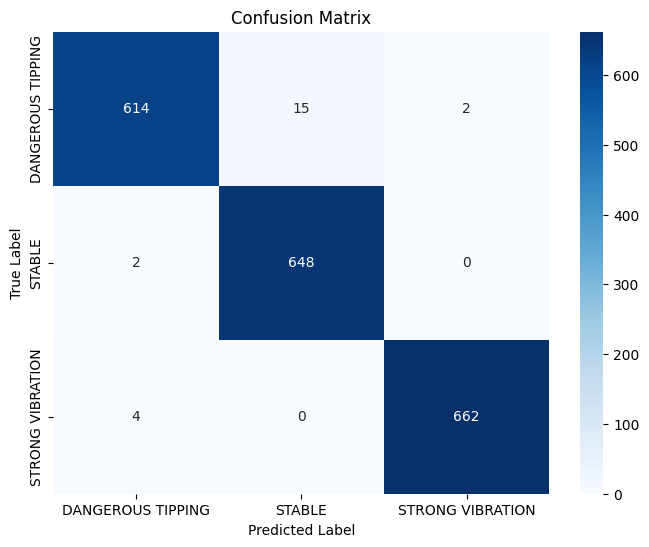

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss trên tập kiểm tra: {loss:.4f}")
print(f"Độ chính xác trên tập kiểm tra: {accuracy:.4f}")

# Dự đoán nhãn trên tập kiểm tra
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Chuyển đổi nhãn số trở lại dạng chuỗi để hiển thị trong classification report và confusion matrix
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_true_labels = label_encoder.inverse_transform(y_true)

# In Classification Report
print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels))

# Vẽ Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=label_encoder.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
model.save('models/lstm_model.h5')
print("Mô hình đã được lưu tại models/lstm_model.h5")

Mô hình đã được lưu tại models/lstm_model.h5
